# <center> Decision Tree Model

## Load Pacakage.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Load Pacakage.

In [2]:
## Read the Data
file=os.path.dirname(os.getcwd())
Clean_DF = pd.read_csv(file+'\\data\\Steam_Clean_Data.csv')
Train_reco = pd.read_csv(file+'\\data\\Train_reco.csv')
Test_reco = pd.read_csv(file+'\\data\\Test_reco.csv')

## Transform Recomendation Data.

Use tfidvectorizer to transform text data

In [3]:
## Instantiate the TfidfVectorizer
Tfidf_reco=TfidfVectorizer(
    input="content",
    lowercase=True, 
    stop_words = "english",max_features = 1000)
Train_DTM_reco = Tfidf_reco.fit_transform(Train_reco['review'])
Test_DTM_reco = Tfidf_reco.transform(Test_reco['review'])

Convert tfidvectorizer result to pandas data frame.

In [4]:
Train_DTM_DF_reco=pd.DataFrame(Train_DTM_reco.toarray(),columns=Tfidf_reco.get_feature_names())
Test_DTM_DF_reco=pd.DataFrame(Test_DTM_reco.toarray(),columns=Tfidf_reco.get_feature_names())

C:\Users\25465\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Recommendation Model

Set an instantiate logistic model

In [6]:
## Instantiate the Decision Tree Model and Fit the Data
MyDT_reco=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=20, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            #min_impurity_split=None, 
                            class_weight=None)


Use trran data to fit the model.

In [7]:
MyDT_reco.fit(Train_DTM_DF_reco, Train_reco['recommendation'])

feature_names = Train_DTM_DF_reco.columns
class_names = Train_reco['recommendation'].unique()

In [8]:
'''
fig = plt.figure(figsize=(30, 30))
MyTree1 = tree.plot_tree(MyDT1, impurity=True, rounded=True,
                         feature_names = feature_names, 
                         class_names = class_names, 
                         filled=True, fontsize=13)
'''

'\nfig = plt.figure(figsize=(30, 30))\nMyTree1 = tree.plot_tree(MyDT1, impurity=True, rounded=True,\n                         feature_names = feature_names, \n                         class_names = class_names, \n                         filled=True, fontsize=13)\n'

Predict the test data

In [9]:
## Predict
DT_pred_reco=MyDT_reco.predict(Test_DTM_DF_reco)

Create a confusion matrix


The confusion matrix is:
[[11759 15862]
 [ 3926 52269]]


C:\Users\25465\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


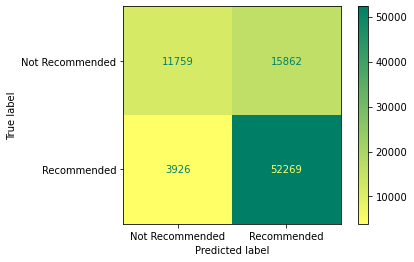


The accuracy of Decision Tree model is: 0.763911425026248


In [10]:
## Evaluate the Models with Confusion Matrix and Accuracy
bn_matrix = confusion_matrix(Test_reco['recommendation'], DT_pred_reco)
print("\nThe confusion matrix is:")
print(bn_matrix)
plot_confusion_matrix(MyDT_reco, Test_DTM_DF_reco, Test_reco['recommendation'], cmap = 'summer_r')
plt.show()
#plt.savefig('MyTree1_cm.png')
print("\nThe accuracy of Decision Tree model is:",accuracy_score(Test_reco['recommendation'], DT_pred_reco))

In [11]:
## Cross Validate
## Instantiate a New TfidfVectorizer
Tfidf=TfidfVectorizer(
    input="content",
    lowercase=True, 
    stop_words = "english",
    max_features = 1000)
Train_cv = Tfidf.fit_transform(Clean_DF["review"])
Train_cv_DF=pd.DataFrame(Train_cv.toarray(),columns=Tfidf.get_feature_names())

C:\Users\25465\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Use cross valiadation to generate logistic model.

In [12]:
## Cross Validete Function
from sklearn.model_selection import cross_val_score, cross_validate
output = cross_validate(estimator=MyDT_reco, X=Train_cv_DF, y=Clean_DF["recommendation"], 
                            cv=6, scoring='accuracy', return_estimator =True)

In [14]:
output['test_score'].mean()

0.7488091465862382

## Feature Importance

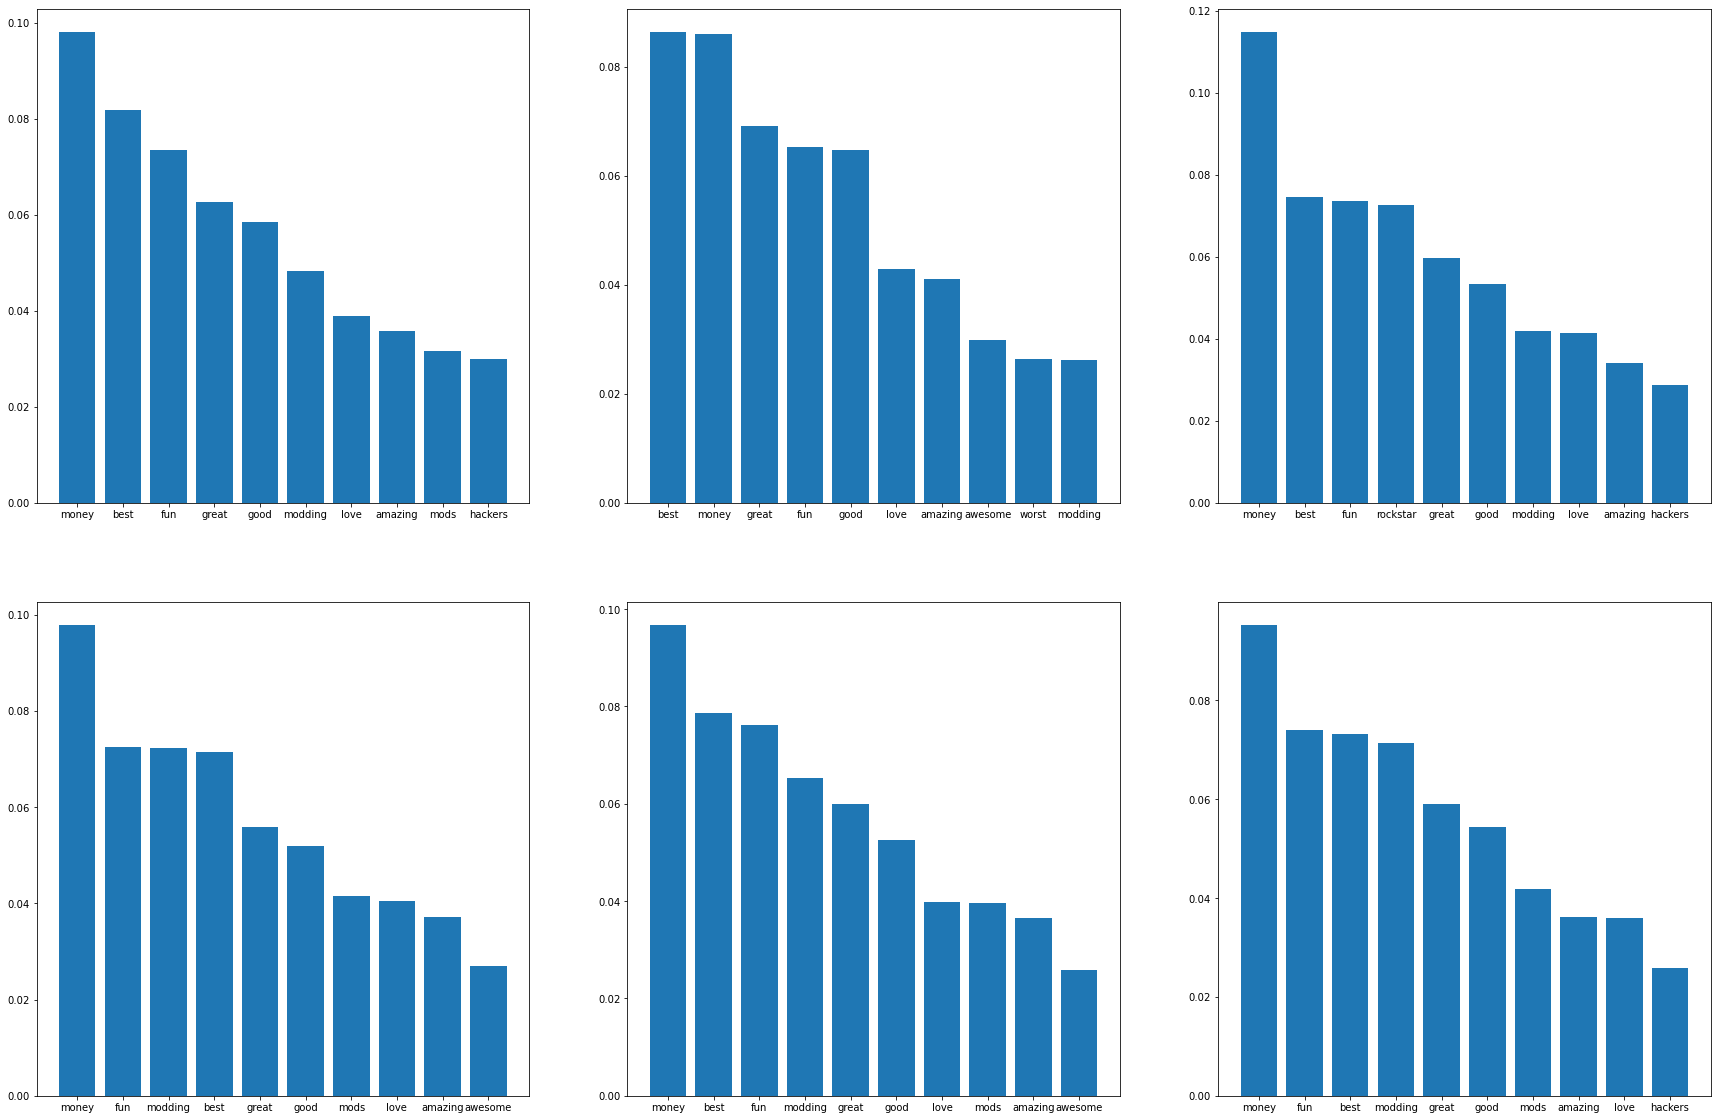

In [15]:
## Visualize the results
fig=plt.figure(figsize=(30,20))

for idx,estimator in enumerate(output['estimator']):
    #print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = Train_cv_DF.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    #print(feature_importances[:10:])
    plt.subplot(231+idx)
    plt.bar(x = feature_importances.index[:10:], height=feature_importances["importance"][:10:])